## Importowanie wszystkich zależności

In [89]:
import DataUtils as du
import numpy as np
from SectionUtils import *
from Augmentation import Augmentation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

## Tworzenie zbioru danych dwu wymiarowych x_train oraz y_train za pomocą funkcji make_blobs z sklearn.datasets.
#### Jest w tym zbiorze danych 500 punktów otoczonych wokół jednego centrum, które zostały stworzone w oparciu o jedno odchylenie standardowe

In [90]:
x_train, y_train = make_blobs(n_samples=500, centers=1, random_state=42, cluster_std=1.0)

### skalowanie danych Standardowym skalowaniem z biblioteki sklearn.preprocesing
### aplikowanie metody LOF
### przesunięcie danych do środka masy

In [91]:
x_train = du.DataUtils.normalize_data(x_train)
x_train = du.DataUtils.remove_outliers_lof(x_train)
x_train = du.DataUtils.shift_to_mass_center(x_train)

### Wykres punktow wygenerowanych

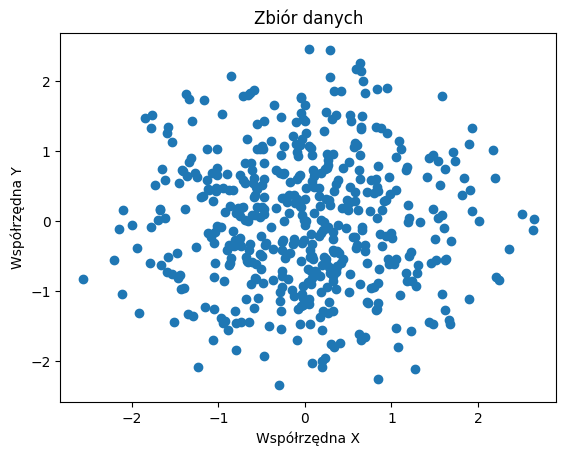

In [92]:
x_train = np.array(x_train)
no_generate = x_train

plt.gca()
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Zbiór danych')
plt.show()

## Poczatek Augmentacji.
### Tworzenie tablicy z elementami klasy Coordinate

In [93]:
x_train = du.DataUtils.listed_class(x_train)

### Przesuwanie punktow o kat phi aby potem latwiej 

In [94]:
du.DataUtils.setPhiShift(x_train)

3.4544134693283306

## Podzial punktow na sekcje


### kolory sekcji

### Liczba sekcji

In [95]:
section_count = 7

### Zainicjalizowanie punktow

In [96]:
sectionGroup = SectionGroup(x_train, section_count)

### Wlasciwy podzial na sekcje

In [97]:
sections = [Section(sectionGroup, i) for i in range(section_count)]

In [98]:
# Normalizacja danych
min = 0
max = len(sections)   
x = np.linspace(0, max - 1, max)
normalized = (x - min) / (max - min)

# Tworzenie kolorów (od zielonego do czerwonego)
colors = [(1 - norm, norm, 0) for norm in normalized]

In [99]:
len(colors)

7

In [100]:
print(colors)

[(np.float64(1.0), np.float64(0.0), 0), (np.float64(0.8571428571428572), np.float64(0.14285714285714285), 0), (np.float64(0.7142857142857143), np.float64(0.2857142857142857), 0), (np.float64(0.5714285714285714), np.float64(0.42857142857142855), 0), (np.float64(0.4285714285714286), np.float64(0.5714285714285714), 0), (np.float64(0.2857142857142857), np.float64(0.7142857142857143), 0), (np.float64(0.1428571428571429), np.float64(0.8571428571428571), 0)]


In [101]:
max_subsec = 0

for section in sections:
    max_subsec = section.subsec_num_phi * section.subsec_num_r * sectionGroup.section_count    

    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]

    for subsection in subsections:
    
        points = subsection.points
        
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        z = random.uniform(0,1)

        for point in points:

            point.setSubsectionID(subsection.subsection_index)
            point.setSectionID(section.section_index)
            point.setGlobalSubsectionID(point.getSectionID() * section.subsec_num_phi * section.subsec_num_r + point.getSubsectionID())

            section_color_normalization = section.section_index / sectionGroup.section_count
            subsection_color_normalization = point.getGlobalSubsectionID() / (section.subsec_num_r * section.subsec_num_phi * sectionGroup.section_count) 

            #ic(point.getGlobalSubsectionID() , section.subsec_num_r , section.subsec_num_phi , sectionGroup.section_count, point.getSectionID(), point.getSubsectionID())          
            
            point.setColorSection((1 - section_color_normalization, section_color_normalization, 0))
            point.setColorSubSection((x,y,z))


In [102]:
ic("max subsec", max_subsec, section_color_normalization, subsection_color_normalization)

ic| "max subsec": 'max subsec'
    max_subsec: 112
    section_color_normalization: 0.8571428571428571
    subsection_color_normalization: 0.9910714285714286


('max subsec', 112, 0.8571428571428571, 0.9910714285714286)

In [103]:
# for point in x_train[:100]:
#     ic(point.getSectionID(), point.getSubsectionID(), point.getGlobalSubsectionID(), point.getColorSection(), point.getColorSubSection())

### Wykres punktow z podzialem na sekcje

#### Wykres punktow x, y

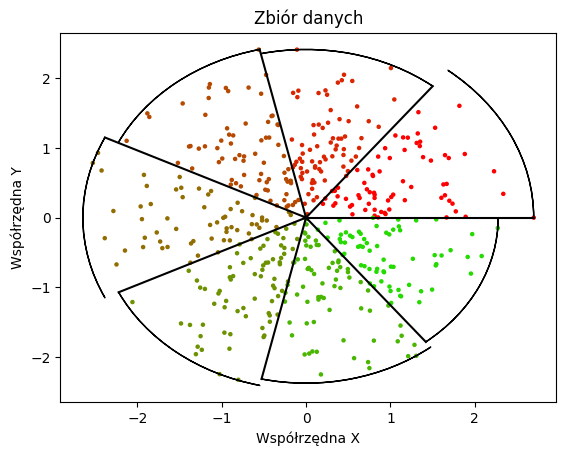

In [104]:
plt.gca()
color_i = 0
for section in sections:
    sect_points = section.points
    sect_color_points = [sect_points[i].getColorSection() for i in range(len(sect_points))]   
    sect_points = [sect_points[i].getXY() for i in range(len(sect_points))]
    
    sect_points = np.array(sect_points)
  
    plt.scatter(sect_points[: , 0], sect_points[: , 1], color=sect_color_points,  s=5)
    sec_x = np.cos(section.phi_size * (section.section_index)) * section.max_r
    sec_y = np.sin(section.phi_size * (section.section_index)) * section.max_r

    plt.plot([0, sec_x], [0, sec_y], color='black')

    wycinek_center = Wedge(center=(0, 0), r=section.max_r, 
                        theta1=np.degrees(section.phi_size * section.section_index), 
                        theta2=np.degrees(section.phi_size * (section.section_index + 1)), width=0.001, color='black')
    
    plt.gca().add_patch(wycinek_center)

    color_i += 1


plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Zbiór danych')
plt.show()

#### Wykres punktow biegunowych

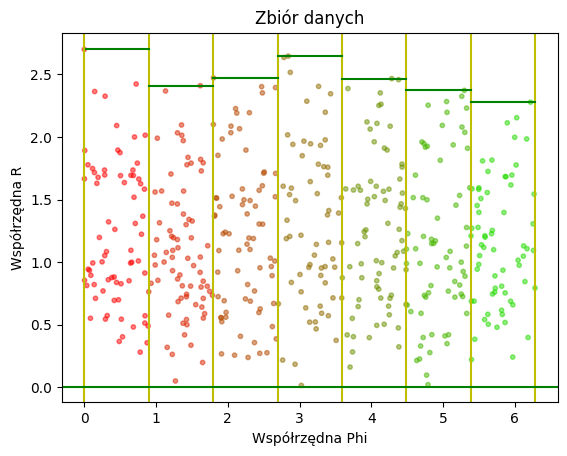

In [105]:
plt.gca()
for section in sections:
    polar_sect_points = section.points
    sect_color_points = [polar_sect_points[i].getColorSection() for i in range(len(polar_sect_points))] 
    polar_sect_points = [[point.getPhi(), point.getR()] for point in polar_sect_points]
    polar_sect_points = np.array(polar_sect_points)
    plt.scatter(polar_sect_points[: , 0], polar_sect_points[: , 1], color=sect_color_points, alpha=0.5, s=10)
    plt.axvline(x=section.phi_size*(section.section_index+1), color='y')
    x_range = np.linspace(section.phi_size*section.section_index, section.phi_size*(section.section_index+1))
    y_value = np.ones_like(x_range) * section.max_r
    
    plt.plot(x_range, y_value, color='g')

plt.axvline(x=0, color='y')
plt.axhline(y=0, color='g')
plt.xlabel('Współrzędna Phi')
plt.ylabel('Współrzędna R')
plt.title('Zbiór danych')
plt.show()

### Podzial na podsekcje

In [106]:
for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]

In [107]:
for subsection in subsections:
    subsection_points = subsection.points
    for point in subsection_points:
        co.Coordinate.setSubsectionID

### Wykres punktow z podzialem na podsekcje
#### Wykres punktow x,y

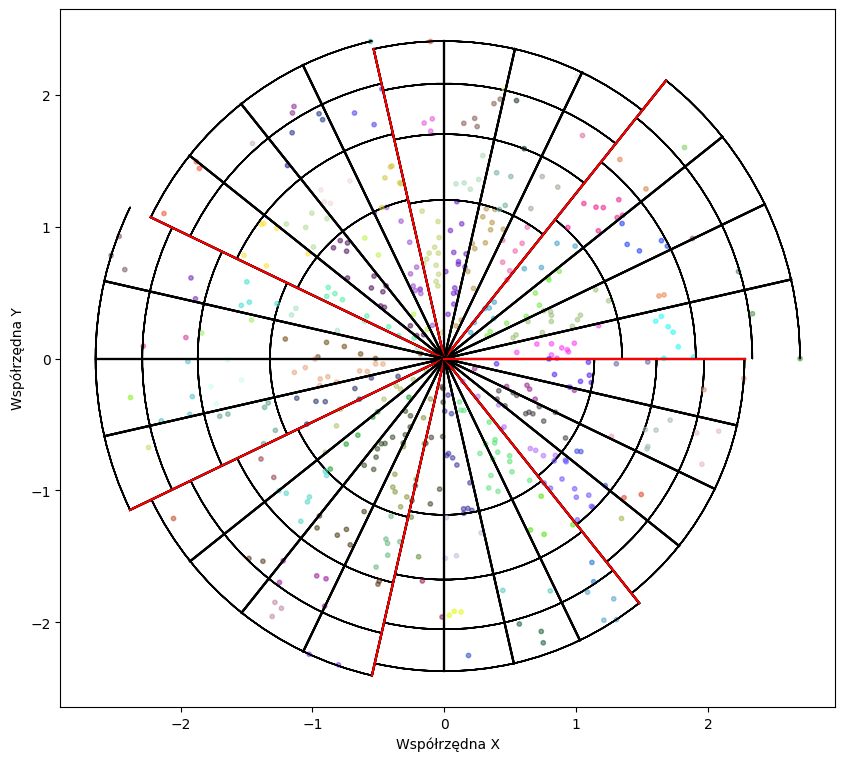

In [108]:
plt.figure(figsize=(10, 10))
color_index = 0
moduler = len(colors) - 1
for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        subsect_points = subsection.points
        sect_color_points = [subsect_points[i].getColorSubSection() for i in range(len(subsect_points))] 
        subsect_points = [point.getXY() for point in subsect_points]
        subsect_points = np.array(subsect_points)
        if len(subsect_points) > 0:
            plt.scatter(subsect_points[:, 0], subsect_points[:, 1], color=sect_color_points, alpha=0.5, s=10)

        wycinek_center = Wedge(center=(0, 0), r=subsection.r_range[1], 
                               theta1=np.degrees(section.phi_size * section.section_index), 
                               theta2=np.degrees(section.phi_size * (section.section_index + 1)), width=0.001, color='black')
        
        plt.gca().add_patch(wycinek_center)
        color_index += 1
        
        x = np.cos(subsection.phi_range[1]) * section.max_r
        y = np.sin(subsection.phi_range[1]) * section.max_r
        plt.plot([0, x], [0, y], color='black')
    
    sec_x = np.cos(section.phi_size * (section.section_index + 1)) * section.max_r
    sec_y = np.sin(section.phi_size * (section.section_index + 1)) * section.max_r
    plt.plot([0, sec_x], [0, sec_y], color='red')
    


plt.gca().set_aspect('equal')
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

#### Wykres punktow biegunowych

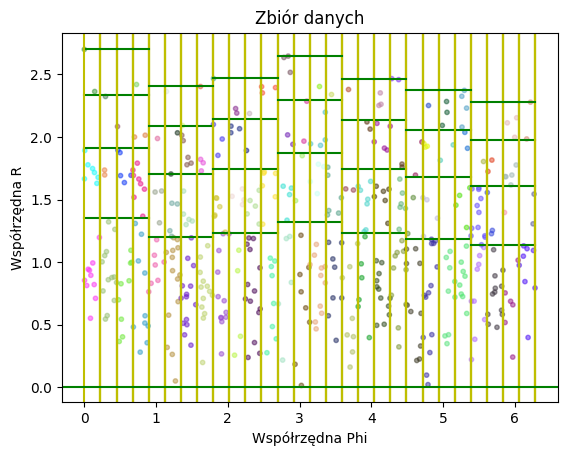

In [109]:
plt.gca()
color_index = 0
for section in sections:
    
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        polar_subsect_points = subsection.points
        sect_color_points = [polar_subsect_points[i].getColorSubSection() for i in range(len(polar_subsect_points))] 
        polar_subsect_points = [[point.getPhi(), point.getR()] for point in polar_subsect_points]
        polar_subsect_points = np.array(polar_subsect_points)
        if len(polar_subsect_points) > 0:
            plt.scatter(polar_subsect_points[:, 0], polar_subsect_points[:, 1], color=sect_color_points, alpha=0.5, s=10)
        plt.axvline(x=subsection.phi_range[1], color='y')
        x_range = np.linspace(subsection.phi_range[0], subsection.phi_range[1])
        y_value = np.ones_like(x_range) * subsection.r_range[1]

        color_index += 1
        
        plt.plot(x_range, y_value, color='g')

plt.axvline(x=0, color='y')
plt.axhline(y=0, color='g')
plt.xlabel('Współrzędna Phi')
plt.ylabel('Współrzędna R')
plt.title('Zbiór danych')
plt.show()

### Dolosowywanie punktow w oparciu o przedzialy R oraz Phi

In [110]:
Augmentation(x_train, section_count, 1000)

### Wykresy po Augmentacji

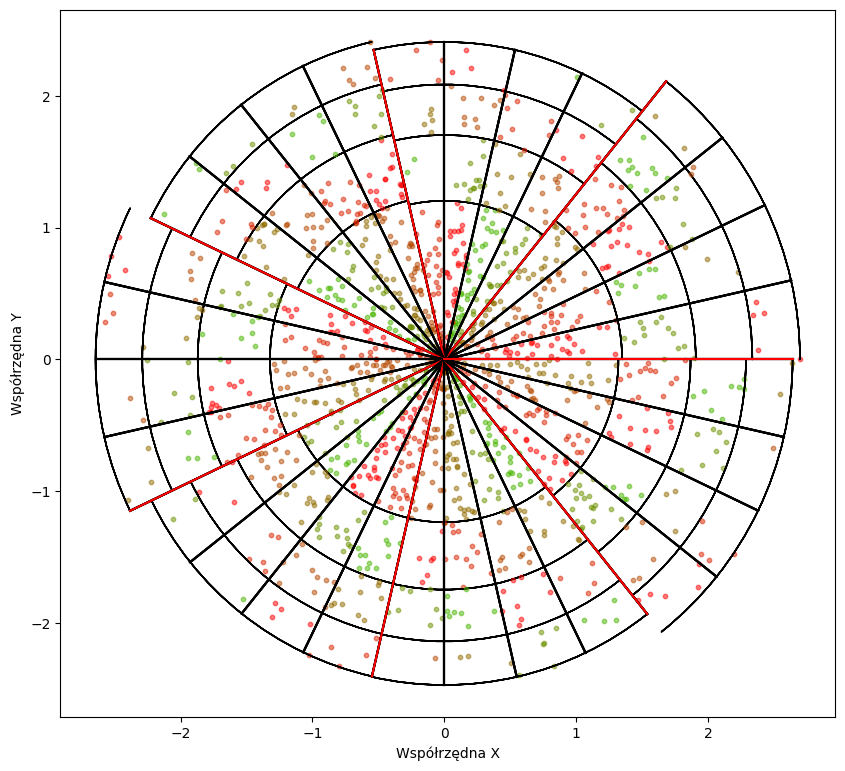

In [111]:
sectionGroup = SectionGroup(x_train, section_count)
sections = [Section(sectionGroup, i) for i in range(section_count)]
plt.figure(figsize=(10, 10))
color_index = 0
moduler = len(colors) - 1
for section in sections:
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        subsect_points = subsection.points
        subsect_points = [point.getXY() for point in subsect_points]
        subsect_points = np.array(subsect_points)
        if len(subsect_points) > 0:
            plt.scatter(subsect_points[:, 0], subsect_points[:, 1], color=colors[color_index%moduler], alpha=0.5, s=10)

        wycinek_center = Wedge(center=(0, 0), r=subsection.r_range[1], 
                               theta1=np.degrees(section.phi_size * section.section_index), 
                               theta2=np.degrees(section.phi_size * (section.section_index + 1)), width=0.001, color='black')
        
        plt.gca().add_patch(wycinek_center)
        color_index += 1
        
        x = np.cos(subsection.phi_range[1]) * section.max_r
        y = np.sin(subsection.phi_range[1]) * section.max_r
        plt.plot([0, x], [0, y], color='black')
    
    sec_x = np.cos(section.phi_size * (section.section_index + 1)) * section.max_r
    sec_y = np.sin(section.phi_size * (section.section_index + 1)) * section.max_r
    plt.plot([0, sec_x], [0, sec_y], color='red')
    


plt.gca().set_aspect('equal')
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.show()

### Wykres zalezny od R i Phi

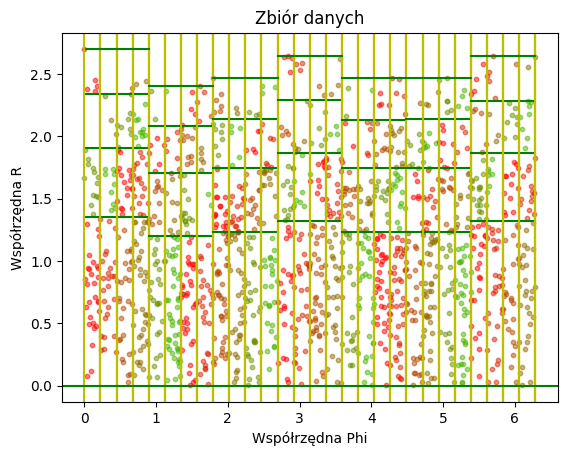

In [112]:
plt.gca()
color_index = 0
for section in sections:
    
    subsections = [SubSection(section, i, j) for i in range(section.subsec_num_phi) for j in range(section.subsec_num_r)]
    for subsection in subsections:
        polar_subsect_points = subsection.points
        polar_subsect_points = [[point.getPhi(), point.getR()] for point in polar_subsect_points]
        polar_subsect_points = np.array(polar_subsect_points)
        if len(polar_subsect_points) > 0:
            plt.scatter(polar_subsect_points[:, 0], polar_subsect_points[:, 1], color=colors[color_index%moduler], alpha=0.5, s=10)
        plt.axvline(x=subsection.phi_range[1], color='y')
        x_range = np.linspace(subsection.phi_range[0], subsection.phi_range[1])
        y_value = np.ones_like(x_range) * subsection.r_range[1]

        color_index += 1
        
        plt.plot(x_range, y_value, color='g')

plt.axvline(x=0, color='y')
plt.axhline(y=0, color='g')
plt.xlabel('Współrzędna Phi')
plt.ylabel('Współrzędna R')
plt.title('Zbiór danych')
plt.show()

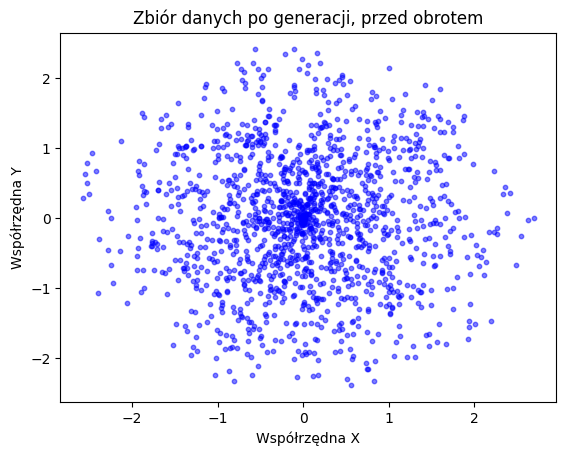

In [113]:
after_generate = [point.getXY() for point in x_train]
after_generate = np.array(after_generate)

plt.gca()
plt.scatter(after_generate[:, 0], after_generate[:, 1], color='blue', alpha=0.5, s=10)
plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Zbiór danych po generacji, przed obrotem')
plt.show()

### Obracamy wszystkie punkty o shiftPhi

In [114]:
co.Coordinate.shiftPhi = 0

### Wykres po obrocie

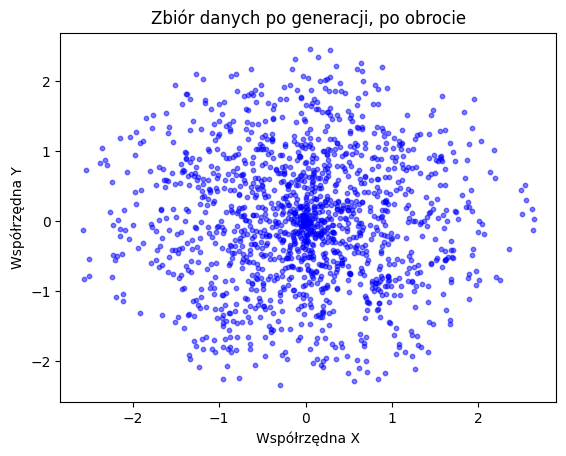

In [115]:
after_rotate = [point.getXY() for point in x_train]
after_rotate = np.array(after_rotate)

plt.gca()
plt.scatter(after_rotate[:, 0], after_rotate[:, 1], color='blue', alpha=0.5, s=10)

plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Zbiór danych po generacji, po obrocie')
plt.show()

## Zakonczenie generowania dodatkowych danych